In [1]:
import pymc as pm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Loading databases using pymc. Here I was using pickle databases if you use hdf5 I guess the code will be a bit different

MCMC8 = pm.database.pickle.load( 'MCMC_f_8.pickle')
MCMC16 = pm.database.pickle.load('MCMC_f_16.pickle')
MCMC32 = pm.database.pickle.load('MCMC_f_32.pickle')

In [4]:
m = 8

# We extract just the traces (i.e. all values) of the gravity with MCMC8.trace('grav')
# with .stats() pymc gives us a dictionary with the main statistical values. Here I am extracting the mean a std for each resolution
# the m is because I computed gravity in more than one point so I was just selecting a gravity forward value
mean8 = MCMC8.trace('grav').stats()['mean'][m]
mean16 = MCMC16.trace('grav').stats()['mean'][m]
mean32 = MCMC32.trace('grav').stats()['mean'][m]

# The same for std
std8 = MCMC8.trace('grav').stats()['standard deviation'][m]
std16 = MCMC16.trace('grav').stats()['standard deviation'][m]
std32 = MCMC32.trace('grav').stats()['standard deviation'][m]

# Here I just put all in a vector because is convinient for plotting
means = np.vstack((mean8, mean16, mean32))
stds = np.vstack((std8, std16, std32))

# This is the real interesting bit the difference of values in the traces
l1 =  MCMC16.trace('grav')[:][:, m] - MCMC8.trace('grav')[:][:,m]
l2 =  MCMC32.trace('grav')[:][:, m] - MCMC16.trace('grav')[:][:,m]

# I am not sure what the mean of the differences says to us exactly we need to think of ths
l1_m = np.mean(l1, axis=0)
l2_m = np.mean(l2, axis=0)

# But this standard deviations are the ones that definetly need to go down as we are comparing finner resolutions
l1_s = np.std(l1, axis=0)
l2_s = np.std(l2, axis=0)

/home/miguel/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [6]:
# Just printing what we just did
stds, l1_s, l2_s

(array([[  2.59151930e-11],
        [  3.52660121e-11],
        [  4.09249660e-11]]), 4.2921926806937725e-11, 5.2947113519146801e-11)

In [7]:
# More printing
means, l1_m, l2_m

(array([[  1.19951186e-09],
        [  1.67928481e-09],
        [  1.94561795e-09]]), 4.7977294590444008e-10, 2.6633313820279484e-10)

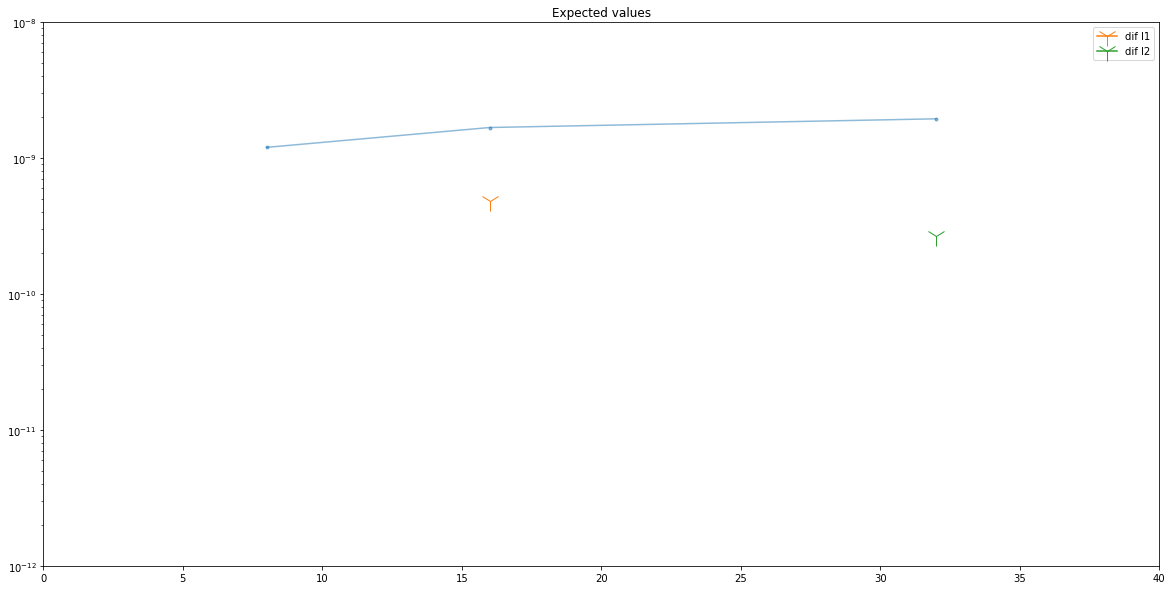

In [10]:
# Here just making an array for the x axis
x = np.vstack((np.ones_like(mean8)*8, np.ones_like(mean16)*16, np.ones_like(mean32)*32)).reshape(3,-1)

plt.figure(figsize=(20,10))
# Plotting the means for each resolution
plt.plot(x, means.reshape(3,-1), marker = '.', alpha=0.5)

# Plotting the mean of the differences (their position in the X axis is completely arbitrary. So orange is 16^3-8^3 and green 32^3-16^3)
plt.plot((np.ones_like(mean16)*16).reshape(1,-1), l1_m.reshape(1,-1), marker='1', markersize = 20, label = 'dif l1')
plt.plot((np.ones_like(mean32)*32).reshape(1,-1), l2_m.reshape(1,-1), marker='1', markersize = 20, label = 'dif l2')
plt.legend()
plt.yscale('log')
plt.ylim( 1e-12, 1e-8,)
plt.xlim(0, 40)
plt.title('Expected values')

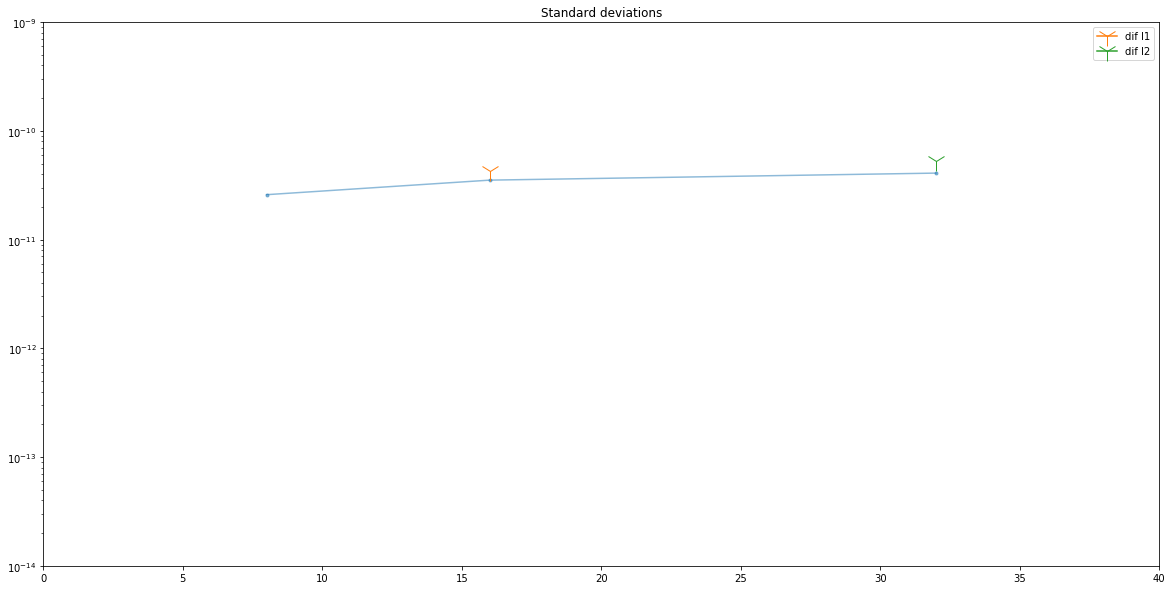

In [11]:
# Here just making an array for the x axis
x = np.vstack((np.ones_like(mean8)*8, np.ones_like(mean16)*16, np.ones_like(mean32)*32)).reshape(3,-1)

plt.figure(figsize=(20,10))
# Plotting the std this line I guess that has to become horizontal eventually? not sure
plt.plot(x, stds.reshape(3,-1), marker = '.', alpha=0.5)

# Plotting the std of the differences (their position in the X axis is completely arbitrary. So orange is 16^3-8^3 and green 32^3-16^3)
# These points are the ones that has to go 0 eventually!
plt.plot((np.ones_like(mean16)*16).reshape(1,-1), l1_s.reshape(1,-1), marker='1', markersize = 20, label = 'dif l1' )
plt.plot((np.ones_like(mean32)*32).reshape(1,-1), l2_s.reshape(1,-1), marker='1', markersize = 20, label = 'dif l2' )
plt.legend()
plt.yscale('log')
plt.ylim(1e-14, 1e-9, )
plt.xlim(0, 40)
plt.title('Standard deviations')

## Stuff I did. Probably nothing useful

In [7]:
np.ones_like(mean16)

array(1.0)

In [15]:
MCMC32.trace('grav')[:,8]

array([  1.95345764e-09,   1.88865449e-09,   1.91199791e-09, ...,
         1.89665099e-09,   2.03340610e-09,   1.91368591e-09])

In [14]:
MCMC16.trace('grav')[:,8]

array([  1.66174395e-09,   1.62121254e-09,   1.69515946e-09, ...,
         1.69985339e-09,   1.67143903e-09,   1.63848440e-09])

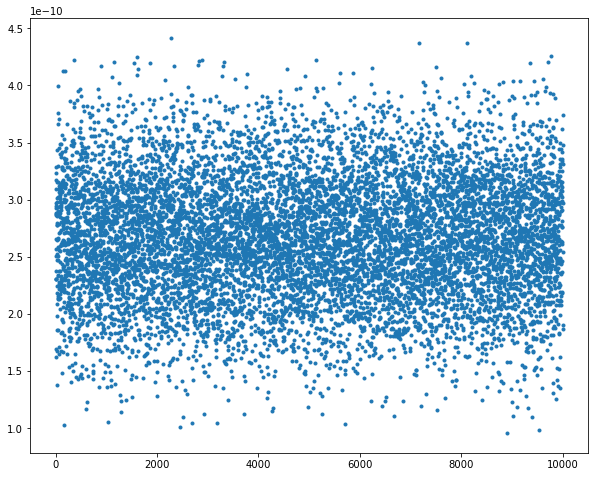

In [22]:
plt.plot(MCMC32.trace('grav')[:,15] - MCMC16.trace('grav')[:,15], '.')

### Speed

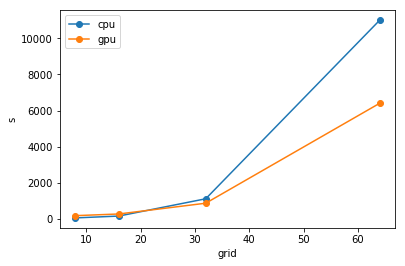

In [35]:
plt.plot([8,16,32,64], [50,153,1110,11000], marker= 'o', label = "cpu")
plt.plot([8,16,32,64], [175,268,865,6400], marker= 'o', label = "gpu")
plt.legend()
plt.xlabel('grid')
plt.ylabel('s')

## Autocorrelation analysis

In [111]:
MCMC32.grav

In [20]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)

Plotting grav


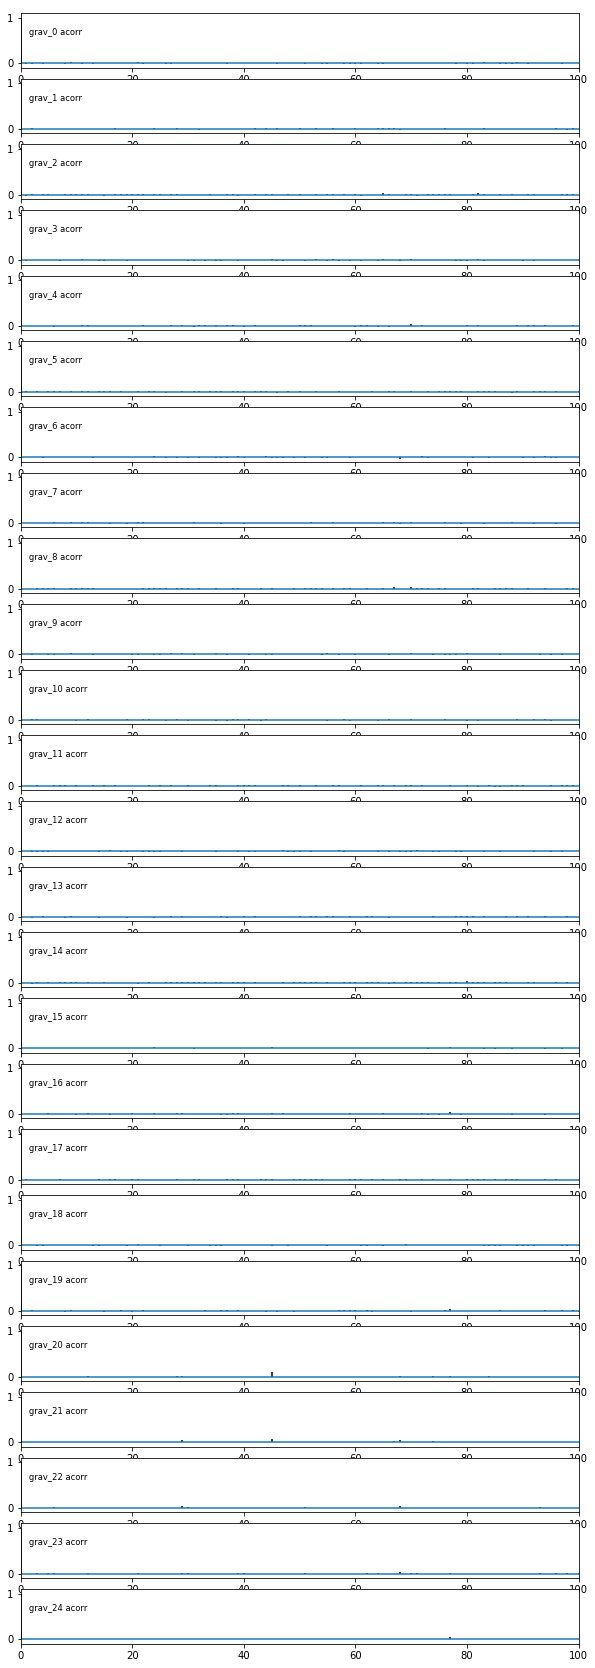

In [122]:

pm.Matplot.autocorrelation(MCMC32.grav)